# Imports

In [28]:
import snowflake.connector as snwconn
import pandas as pd
import os
from dotenv import load_dotenv

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.calibration import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

load_dotenv()

True

# Utility

In [29]:
def fetchTable(table_name, cursor):
    sql_query = f"SELECT * FROM {table_name}"
    cursor.execute(sql_query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    return df

# Reading Datasets from Snowflake

## Reading from Stage

### Setup

In [26]:
conn_params = {
    'account': os.getenv('SNW_ACCOUNT').replace('.', '-'),
    'user': os.getenv('SNW_USERNAME'),
    'password': os.getenv('SNW_PASS'),
    'warehouse': 'COMPUTE_WH',
    'database': 'JMAN_FINAL_PROJECT',
    'schema': 'DBO_STAGING'
}

In [27]:
conn = snwconn.connect(**conn_params)
cursor = conn.cursor()

### Read Tables

#### feedbackanswers_df

In [ ]:
feedbackanswers_df = fetchTable("STG_FEEDBACKANSWERS", cursor)
feedbackanswers_df

,PROJECT_NAME,FEEDBACKQUESTION_NAME,DATE_START,DATE_END,USER_EMAIL,CHECKED_ANSWER,TEXT_ANSWER
0,Abbott-Carter Solution,How satisfied are you with the level of transp...,21-08-2022,27-08-2022,bgreen@example.org,3,
1,Stevenson-Johnson Project,Rate the effectiveness of the project manageme...,24-07-2022,30-07-2022,jenniferlevy@example.net,3,
2,Abbott-Carter Solution,How satisfied are you with the level of transp...,02-04-2023,08-04-2023,johnsonerica@example.org,5,
3,Herrera Ltd Initiative,How satisfied are you with the project deliver...,07-01-2024,13-01-2024,nguyentiffany@example.net,5,Good
4,"Brown, Sims and Davis Initiative",Rate the effectiveness of the project manageme...,10-12-2023,16-12-2023,ambersmith@example.net,5,
...,...,...,...,...,...,...,...
7995,Schneider and Sons Solution,Rate the effectiveness of the project manageme...,11-09-2022,17-09-2022,pmorrison@example.net,1,Excellent
7996,"Brown, Sims and Davis Initiative",How would you rate the problem-solving skills ...,21-08-2022,27-08-2022,johnkennedy@example.com,1,
7997,"Brown, Vasquez and Bush Initiative",Rate the effectiveness of the project feedback...,05-03-2023,11-03-2023,csims@example.org,2,
7998,"Lang, Allen and Hayes Solution",How satisfied are you with the level of transp...,31-03-2024,06-04-2024,mcmillansherri@example.net,2,


#### feedbackquestions_df

In [ ]:
feedbackquestions_df = fetchTable("STG_FEEDBACKQUESTIONS", cursor)
feedbackquestions_df

,ID,QUESTION
0,a7daa3fa-69db-42df-930c-19babbb440b8,How satisfied are you with the overall progres...
1,1a93aa51-6d3f-49ed-8044-376418ca79e4,Rate the communication between team members on...
2,26d46b3b-5d98-4715-9f63-2053bc60f32c,Did you find the project timeline realistic? P...
3,987cd9f8-7c5d-452a-b1ea-7c6acec3cd16,How would you rate the quality of work deliver...
4,cdcd19fb-995b-4096-9051-26db9c49b8fd,Rate the effectiveness of the project manageme...
5,9a5e7c95-a3f8-47ae-aa88-4f03c74c74e0,Were the project goals clearly defined? Please...
6,8e28412a-0615-47aa-8ea1-5ca5f2ce8f18,How satisfied are you with the level of collab...
7,ce7311c4-37a8-42e4-8c9b-769c6d7c7ab1,Rate the accuracy of the project budget estima...
8,5fb5b911-697a-4db2-911f-98a122d4aa17,Did the project meet your expectations? Please...
9,63805f7e-1d87-4bca-b399-c7b5f44be9ea,How would you rate the problem-solving skills ...


#### projects_df

In [ ]:
projects_df = fetchTable("STG_PROJECTS", cursor)
projects_df

,ID,NAME,DOMAIN
0,50053ffa-96aa-4494-94b9-d9330b81fe9d,Gonzalez-Becker Initiative,Telecommunications
1,d4e0fec4-0117-435d-abd8-52afd1d20ea2,"Nguyen, Peters and Walker Initiative",Healthcare
2,22d2a96c-bb93-40af-8682-cdea6b45fc48,Abbott-Carter Solution,Cybersecurity
3,c3de9633-a182-4841-9ca5-3b251ca9fe35,Martin-Ball Project,Financial Services
4,05f36a38-8c60-4f6a-b5f2-51e666f33bc6,Brown Inc Initiative,Transportation and Logistics
5,1dfa8aa1-af13-461f-b671-d238523e05b2,Stevenson-Johnson Project,E-commerce
6,b65d69e0-06cd-483b-bd7f-39358f91dc26,Serrano and Sons Solution,Cybersecurity
7,f46aa804-2724-496f-9b52-82014c7ee1e0,"Brown, Vasquez and Bush Initiative",Telecommunications
8,f6ffb81a-a76f-42b6-93d7-5b70eb25b8f7,Cabrera Inc Project,Telecommunications
9,28deece0-a11d-4b90-8a28-dc3556cdf8d7,Hurley Group Project,E-commerce


#### projects_to_feedbackquestions_df

In [ ]:
projects_to_feedbackquestions_df = fetchTable("STG_PROJECTSTOFEEDBACKQUESTIONS", cursor)
projects_to_feedbackquestions_df

,PROJECT_NAME,QUESTION_NAME
0,Ford LLC Solution,Rate the level of innovation demonstrated in t...
1,Scott and Sons Project,How satisfied are you with the level of transp...
2,Cabrera Inc Project,Rate the level of stakeholder engagement on a ...
3,"Gonzalez, Anderson and Walsh Project",Were the project risks effectively managed? Pl...
4,Brown Inc Initiative,Were the project risks effectively managed? Pl...
...,...,...
1995,Lindsey Inc Initiative,Did you find the project timeline realistic? P...
1996,"Chase, Molina and Mccoy Initiative",How would you rate the quality of work deliver...
1997,Snow-Lee Project,Did the project meet your expectations? Please...
1998,Brown Inc Initiative,Rate the level of stakeholder engagement on a ...


#### projects_to_users_df

In [ ]:
projects_to_users_df = fetchTable("STG_PROJECTSTOUSERS", cursor)
projects_to_users_df

,PROJECT_NAME,USER_EMAIL
0,Moreno-Jackson Project,paynegeorge@example.org
1,Martin-Ball Project,julia57@example.net
2,Martin-Ball Project,josewilson@example.org
3,Simpson-Caldwell Project,alansherman@example.com
4,"Brown, Sims and Davis Initiative",ambersmith@example.net
...,...,...
4995,Castillo PLC Solution,kristin30@example.net
4996,Lin-Johnson Solution,flowerssylvia@example.net
4997,"Stevens, Andrews and Medina Initiative",fray@example.net
4998,Hernandez-Wells Initiative,paulakeller@example.net


#### timesheets_df

In [ ]:
timesheets_df = fetchTable("STG_TIMESHEETS", cursor)
timesheets_df

,USER_EMAIL,PROJECT_SELECTED,DATE_START,DATE_END,COMMENT_ADDED,D0,D1,D2,D3,D4,D5,D6,ACTIVITY_NAME
0,ygreen@example.org,Schneider and Sons Solution,24-03-2024,30-03-2024,,2,0,5,5,5,6,0,Sales Activity
1,jacksonjennifer@example.org,"Lang, Allen and Hayes Solution",02-04-2023,08-04-2023,Can't wait to see the end result,0,6,5,5,0,0,2,Sales Activity
2,maysnicole@example.org,Martin-Ball Project,18-06-2023,24-06-2023,,0,4,0,0,0,0,3,BAU Activity
3,matthewwilson@example.com,"Stevens, Andrews and Medina Initiative",17-12-2023,23-12-2023,Can't wait to see the end result,0,6,4,0,0,0,0,Sales Activity
4,chad42@example.net,"Austin, Barnes and Marquez Initiative",21-05-2023,27-05-2023,Looking forward to the challenge,2,6,4,4,0,0,2,Sales Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,qortega@example.org,Moreno-Jackson Project,02-04-2023,08-04-2023,Looking forward to the challenge,2,11,6,0,9,5,1,BAU Activity
9996,julieshepherd@example.org,Henry-Sandoval Project,05-02-2023,11-02-2023,Can't wait to see the end result,0,4,6,4,7,0,0,BAU Activity
9997,bryanmoss@example.net,Ford LLC Solution,19-02-2023,25-02-2023,,0,5,5,0,1,4,11,Sales Activity
9998,franciscobaker@example.com,Castillo PLC Solution,29-05-2022,04-06-2022,,12,11,4,4,0,3,12,Sales Activity


#### users_df

In [ ]:
users_df = fetchTable("STG_USERS", cursor)
users_df

,EMAIL,PASS,ROLE,NAME
0,kimberlyhaynes@example.com,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,user,Jorge Lewis
1,grant38@example.com,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,admin,Curtis Ortega
2,ballpatrick@example.net,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,user,Christopher Humphrey
3,lopezjennifer@example.net,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,user,Christina Banks
4,martineznatasha@example.net,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,user,Marcus Hanson
...,...,...,...,...
4995,brenda77@example.org,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,manager,Leslie Knight
4996,dchoi@example.com,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,employee,Jeff Marsh
4997,richardrodriguez@example.com,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,employee,Robert Richard
4998,shortjennifer@example.com,$2b$12$hNxYtVbazBur0g4/iz2KQe6HkbNnvH5XVzEujgb...,user,Deborah Massey


### Close Connection

In [ ]:
cursor.close()
conn.close()

## Reading from Mart

### Setup

In [ ]:
conn_params = {
    'account': os.getenv('SNW_ACCOUNT'),
    'user': os.getenv('SNW_USERNAME'),
    'password': os.getenv('SNW_PASS'),
    'warehouse': 'COMPUTE_WH',
    'database': 'JMAN_FINAL_PROJECT',
    'schema': 'DBO_MART'
}

In [ ]:
conn = snwconn.connect(**conn_params)
cursor = conn.cursor()

In [ ]:
SQL_JOIN_ALL = "SELECT "

### Read Tables

#### average_rating_per_user_per_project_df

In [ ]:
average_rating_per_user_per_project_df = fetchTable("AVERAGERATINGPERUSERPERPROJECT", cursor)
average_rating_per_user_per_project_df

,USER_EMAIL,NAME,PROJECT_NAME,DOMAIN,AVERAGE_RATING
0,bgreen@example.org,Sonya Hardy,Abbott-Carter Solution,Cybersecurity,2.500000
1,jenniferlevy@example.net,Tara Walker,Stevenson-Johnson Project,E-commerce,3.500000
2,johnsonerica@example.org,Michelle Duran,Abbott-Carter Solution,Cybersecurity,3.400000
3,nguyentiffany@example.net,Jordan Shelton,Herrera Ltd Initiative,Renewable Energy,5.000000
4,ambersmith@example.net,Thomas Thompson,"Brown, Sims and Davis Initiative",Transportation and Logistics,5.000000
...,...,...,...,...,...
3284,lisa34@example.net,Nancy Ewing,"Lang, Allen and Hayes Solution",Telecommunications,3.000000
3285,buckbrenda@example.org,Maureen Moore,"Stevens, Andrews and Medina Initiative",Artificial Intelligence and Machine Learning,1.000000
3286,lesliethompson@example.com,Kevin Rogers,Austin-Clark Project,Financial Services,3.000000
3287,stevenjohnson@example.com,Lori Duffy,"Stevens, Andrews and Medina Initiative",Artificial Intelligence and Machine Learning,2.000000


#### average_rating_for_project_df

In [ ]:
average_rating_for_project_df = fetchTable("AVERAGERATINGSFORPROJECT", cursor)
average_rating_for_project_df

,PROJECT_NAME,AVERAGE_RATING
0,Abbott-Carter Solution,2.483092
1,Stevenson-Johnson Project,2.574468
2,"Brown, Sims and Davis Initiative",2.398964
3,Greene Inc Initiative,2.566265
4,Simpson-Caldwell Project,2.283333
5,"Brown, Vasquez and Bush Initiative",2.354167
6,"Jimenez, Mendez and Lewis Initiative",2.266667
7,"Donovan, Tyler and Cabrera Solution",2.285714
8,Scott and Sons Project,2.105263
9,Brown Inc Initiative,2.510753


#### days_spans_for_project_df

In [ ]:
days_spans_for_project_df = fetchTable("DAYSPANSFORPROJECT", cursor)
days_spans_for_project_df

,PROJECT_SELECTED,DATE_START,DATE_END,TOTAL_DAYS_SPAN,TOTAL_DAYS_WORKED_FOR,DAYS_GAPS,EFFICIENCY
0,"Diaz, Lam and Maldonado Project",10-04-2022,13-04-2024,734,672,62,96.956500
1,Hernandez-Wells Initiative,10-04-2022,13-04-2024,734,637,97,81.739100
2,"Sanchez, Jackson and Scott Initiative",10-04-2022,06-04-2024,727,539,188,42.173900
3,"Jimenez, Mendez and Lewis Initiative",10-04-2022,13-04-2024,734,651,83,87.826100
4,"Adams, Mcgee and Baker Initiative",10-04-2022,13-04-2024,734,644,90,84.782600
5,Henry-Sandoval Project,10-04-2022,06-04-2024,727,623,104,78.695700
6,Patrick Inc Initiative,10-04-2022,06-04-2024,727,651,76,90.869600
7,"Donovan, Tyler and Cabrera Solution",10-04-2022,13-04-2024,734,595,139,63.478300
8,Love Ltd Solution,10-04-2022,13-04-2024,734,630,104,78.695700
9,"Jackson, Nguyen and Crawford Project",10-04-2022,13-04-2024,734,532,202,36.087000


#### total_hours_per_project_df

In [ ]:
total_hours_per_project_df = fetchTable("TOTALHOURSPERPROJECT", cursor)
total_hours_per_project_df

,PROJECT_SELECTED,TOTAL_HOURS,TOTAL_HOURS_WEEKENDS,TOTAL_HOURS_WEEKDAYS
0,Schneider and Sons Solution,4617,865,3752
1,"Lang, Allen and Hayes Solution",4917,963,3954
2,Martin-Ball Project,5818,1182,4636
3,"Stevens, Andrews and Medina Initiative",5351,1001,4350
4,"Austin, Barnes and Marquez Initiative",5956,1058,4898
5,Love Ltd Solution,5202,1077,4125
6,Moreno-Jackson Project,5178,1002,4176
7,"Jackson, Nguyen and Crawford Project",3127,574,2553
8,Brown Inc Initiative,4147,740,3407
9,Lopez Inc Initiative,4742,912,3830


#### total_hours_per_project_per_activity_df

In [ ]:
total_hours_per_project_per_activity_df = fetchTable("TOTALHOURSPERPROJECTPERACTIVITY", cursor)
total_hours_per_project_per_activity_df

,PROJECT_SELECTED,ACTIVITY_NAME,TOTAL_HOURS,TOTAL_HOURS_WEEKENDS,TOTAL_HOURS_WEEKDAYS
0,Schneider and Sons Solution,Sales Activity,1993,406,1587
1,"Lang, Allen and Hayes Solution",Sales Activity,2256,458,1798
2,Martin-Ball Project,BAU Activity,2943,616,2327
3,"Stevens, Andrews and Medina Initiative",Sales Activity,2571,493,2078
4,"Austin, Barnes and Marquez Initiative",Sales Activity,3277,585,2692
...,...,...,...,...,...
95,Butler-Acosta Solution,BAU Activity,2033,455,1578
96,"Sanchez, Jackson and Scott Initiative",Sales Activity,1724,290,1434
97,"Chase, Molina and Mccoy Initiative",BAU Activity,2330,453,1877
98,Stevenson-Johnson Project,Sales Activity,2567,576,1991


#### total_hours_per_project_per_user_df

In [ ]:
total_hours_per_project_per_user_df = fetchTable("TOTALHOURSPERPROJECTPERUSER", cursor)
total_hours_per_project_per_user_df

,PROJECT_SELECTED,USER_EMAIL,NAME,TOTAL_HOURS,TOTAL_HOURS_WEEKENDS,TOTAL_HOURS_WEEKDAYS
0,Schneider and Sons Solution,ygreen@example.org,Eric Reynolds,38,4,34
1,"Lang, Allen and Hayes Solution",jacksonjennifer@example.org,Dennis Cooper,126,22,104
2,Martin-Ball Project,maysnicole@example.org,Thomas Webb,22,10,12
3,"Stevens, Andrews and Medina Initiative",matthewwilson@example.com,Lisa Valentine,26,6,20
4,"Austin, Barnes and Marquez Initiative",chad42@example.net,Curtis Floyd,140,27,113
...,...,...,...,...,...,...
4284,Lin-Johnson Solution,jrogers@example.org,Donald Dixon,21,9,12
4285,"Diaz, Lam and Maldonado Project",wattsdaniel@example.com,Dr. Jennifer Kramer,45,8,37
4286,Cabrera Inc Project,rebekahzamora@example.com,Gerald Pittman,64,24,40
4287,Taylor LLC Project,stephenrobinson@example.org,Brandon Strickland,23,2,21


#### total_hours_per_user_df

In [ ]:
total_hours_per_user_df = fetchTable("TOTALHOURSPERUSER", cursor)
total_hours_per_user_df

,USER_EMAIL,NAME,TOTAL_HOURS,TOTAL_HOURS_WEEKENDS,TOTAL_HOURS_WEEKDAYS
0,ygreen@example.org,Eric Reynolds,146,24,122
1,jacksonjennifer@example.org,Dennis Cooper,270,54,216
2,matthewwilson@example.com,Lisa Valentine,96,13,83
3,jane99@example.net,Alexander Hayden,28,3,25
4,walkermargaret@example.com,Rebecca Guerrero,100,10,90
...,...,...,...,...,...
2879,dleblanc@example.net,Connor Wolfe,24,7,17
2880,brocklauren@example.net,Lynn Brown,32,0,32
2881,mfox@example.com,Dustin Smith,13,1,12
2882,justin80@example.org,Daniel Miles,14,1,13


#### total_hours_per_user_per_activity_df

In [ ]:
total_hours_per_user_per_activity_df = fetchTable("TOTALHOURSPERUSERPERACTIVITY", cursor)
total_hours_per_user_per_activity_df

,USER_EMAIL,NAME,ACTIVITY_NAME,TOTAL_HOURS,TOTAL_HOURS_WEEKENDS,TOTAL_HOURS_WEEKDAYS
0,ygreen@example.org,Eric Reynolds,Sales Activity,96,9,87
1,jacksonjennifer@example.org,Dennis Cooper,Sales Activity,180,31,149
2,maysnicole@example.org,Thomas Webb,BAU Activity,7,3,4
3,matthewwilson@example.com,Lisa Valentine,Sales Activity,29,1,28
4,chad42@example.net,Curtis Floyd,Sales Activity,82,21,61
...,...,...,...,...,...,...
4662,karenhubbard@example.net,Nicole Parker,BAU Activity,13,2,11
4663,aliciaandrews@example.com,James Ball,Sales Activity,27,10,17
4664,zphelps@example.com,Thomas Campos,BAU Activity,27,8,19
4665,normafrazier@example.com,Peggy Wolfe,Sales Activity,13,6,7


#### users_main_domain_df

In [ ]:
users_main_domain_df = fetchTable("USERSMAINDOMAIN", cursor)
users_main_domain_df

,USER_EMAIL,NAME,DOMAIN,AVERAGE_RATING,NUMBER_OF_PROJECTS_FOR_DOMAIN
0,bgreen@example.org,Sonya Hardy,Cybersecurity,2.500000,6
1,jenniferlevy@example.net,Tara Walker,E-commerce,3.500000,4
2,johnsonerica@example.org,Michelle Duran,Cybersecurity,3.400000,5
3,nguyentiffany@example.net,Jordan Shelton,Renewable Energy,5.000000,1
4,ambersmith@example.net,Thomas Thompson,Transportation and Logistics,5.000000,1
...,...,...,...,...,...
3174,dukekyle@example.com,Lauren Wilson,Financial Services,2.500000,4
3175,cynthia83@example.com,Joan Martinez,Transportation and Logistics,2.000000,1
3176,jason43@example.org,Brenda King,E-commerce,2.000000,1
3177,kimberly81@example.org,Noah Kelley,E-commerce,2.000000,3


#### users_per_role_df

In [ ]:
users_per_role_df = fetchTable("USERSPERROLE", cursor)
users_per_role_df

,ROLE,COUNT
0,user,2513
1,admin,462
2,manager,987
3,employee,1038


### Close Connection

In [ ]:
cursor.close()
conn.close()

# EDA

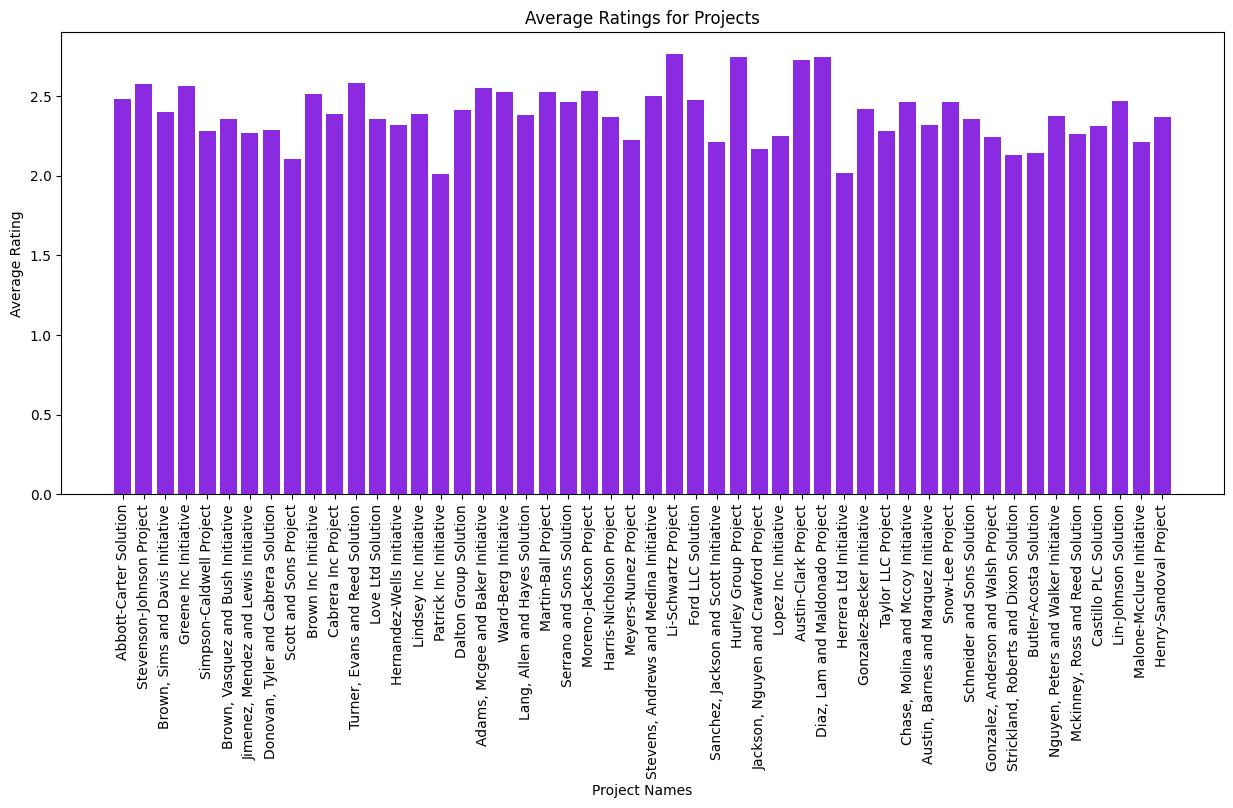

In [ ]:
plt.figure(figsize=(15, 6))

plt.bar(average_rating_for_project_df['PROJECT_NAME'], average_rating_for_project_df['AVERAGE_RATING'], color='blueviolet')
plt.title("Average Ratings for Projects")
plt.xlabel('Project Names')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()